# 🦾Model Fitness Gym

___
## 🏢 Contexto Empresarial

Model Fitness, una cadena de gimnasios con enfoque en innovación y experiencia del cliente, se encuentra desarrollando una estrategia de interacción basada en datos analíticos. Uno de los desafíos más críticos que enfrenta la industria del fitness es la **pérdida de clientes**, fenómeno conocido como *churn*.

A diferencia de otros servicios donde el abandono puede ser explícito (cancelación de cuenta, falta de renovación), en el entorno de los gimnasios el cliente puede **desaparecer sin previo aviso**, dejando de asistir sin formalizar su baja. Esta pérdida silenciosa representa un riesgo operativo y financiero, ya que dificulta la planificación y la toma de decisiones estratégicas.

Para abordar esta problemática, Model Fitness ha digitalizado perfiles de clientes y recopilado información detallada sobre su comportamiento, historial de visitas, tipo de contrato y nivel de interacción con servicios adicionales. El objetivo es **anticipar el abandono**, identificar patrones de riesgo y diseñar **estrategias de retención personalizadas** que mejoren la experiencia del cliente y fortalezcan su vínculo con la marca.

Este proyecto se enmarca dentro de esa iniciativa, utilizando técnicas de análisis de datos y modelado predictivo para detectar clientes en riesgo de cancelación y proponer acciones concretas que reduzcan la rotación.


____
## 🎯Objetivo
Desarrollar un modelo analítico que permita predecir la probabilidad de abandono de clientes en gimnasios Model Fitness, utilizando datos históricos de comportamiento, perfil demográfico y estado de membresía.


___
### 📌Subobjetivos
- **Identificar patrones de comportamiento** que preceden al abandono
- **Segmentar perfiles de clientes** según su riesgo y características
- **Determinar los factores más influyentes** en la decisión de cancelar
- **Generar recomendaciones accionables** para reducir la pérdida de clientes y mejorar la retención
___

## 🗂️ Descripción del Dataset

El dataset **`gym_churn_us.csv`** contiene información consolidada sobre clientes de Model Fitness, combinando datos del mes anterior con el estado actual de su membresía. Cada fila representa un cliente único, y todas las variables están en formato numérico.

> 🔹 **Convención general**:  
> Para variables binarias, se asume:  
> `0` = No / False  
> `1` = Sí / True  
>  
> ⚠️ **Excepción**: La variable `'gender'` está codificada como `0` y `1`, pero el significado exacto (masculino/femenino) no está especificado en el dataset ni en la documentación.

---

### 📌 Columnas del Dataset

#### 🧍‍♂️ Datos del cliente (mes anterior)

- **`gender`**  
  Género del cliente. Codificado como `0` y `1`, pero sin definición explícita de correspondencia.

- **`Near_Location`**  
  Vive o trabaja cerca del gimnasio.

- **`Partner`**  
  Trabaja en una empresa asociada.

- **`Promo_friends`**  
  Se inscribió mediante una promoción “trae a un amigo”.

- **`Phone`**  
  Proporcionó número de teléfono.

- **`Age`** *(variable continua)*  
  Edad del cliente en años.

- **`Lifetime`** *(variable continua)*  
  Tiempo total (en meses) desde que el cliente se unió al gimnasio.

---

#### 📅 Datos de membresía y comportamiento actual

- **`Contract_period`** *(variable continua)*  
  Duración del contrato actual (en meses): `1`, `3`, `6`, `12`.

- **`Month_to_end_contract`** *(variable continua)*  
  Meses restantes hasta que finalice el contrato.

- **`Group_visits`**  
  Participa en sesiones grupales.

- **`Avg_class_frequency_total`** *(variable continua)*  
  Frecuencia media de visitas por semana a lo largo de la vida del cliente.

- **`Avg_class_frequency_current_month`** *(variable continua)*  
  Frecuencia media de visitas por semana durante el mes actual.

- **`Avg_additional_charges_total`** *(variable continua)*  
  Total gastado en servicios adicionales (cafetería, productos deportivos, masajes, etc.).

---

#### 🎯 Variable objetivo

- **`Churn`**  
  Cancelación en el mes actual.
___

# 🔎Analisis Exploratorio de datasets

## ⏳Carga de Librerias necesarias


In [12]:
# Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias para machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import sys



## 📥Importacion de datos

In [13]:
# Bloque try-except para manejar errores al cargar datos
try:
    df = pd.read_csv('gym_churn_us.csv')

except FileNotFoundError:
    print("Error: El archivo no se encuentra.")
except pd.errors.EmptyDataError:
    print("Error: El archivo está vacío.")
except pd.errors.ParserError:
    print("Error: Error al parsear el archivo.")
except Exception as e:
    print(f"Error inesperado: {e}")
else:
    print("Datos cargados exitosamente.")

Datos cargados exitosamente.


## 📝Inspeccion de dataset

In [14]:
# dimensiones y tipo de datos
print(f"Dimensiones del dataset: {df.shape}")
print(f"Características del dataset:\n{df.info()}\n")

Dimensiones del dataset: (4000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_

In [15]:
# Estandarizacion de nombres de columnas a minusculas
df.columns = df.columns.str.lower().str.strip()

____
### ✅Exploración Inicial del Conjunto de Datos
Como parte del proceso de análisis y construcción de un modelo predictivo, se realizó una exploración preliminar del conjunto de datos con el objetivo de comprender su estructura y preparar las variables para su procesamiento.

- **Dimensiones y estructura**

El conjunto de datos contiene **4000 registros** distribuidos en **14 columnas**, de las cuales `13 corresponden a características y 1 a la variable objetivo`, denominada **`churn`**. Esto confirma que se trata de un problema de **`aprendizaje supervisado`**, ya que se cuenta con etiquetas para entrenar el modelo.

- **Tipos de datos**
  
Todas las columnas contienen datos numéricos, con 10 variables de tipo entero (int64) y 4 de tipo decimal (float64). **No se detectaron valores nulos (NaN)**, lo que elimina la necesidad de aplicar técnicas de imputación en esta etapa.

- **Preparación de nombres de columnas**
  
Se aplicó una estandarización a los nombres de las columnas, asegurando que estén en **minúsculas y sin espacios adicionales**, lo que mejora la legibilidad y previene errores durante el procesamiento.
___

In [16]:
# Estadisticas basicas del dataset
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


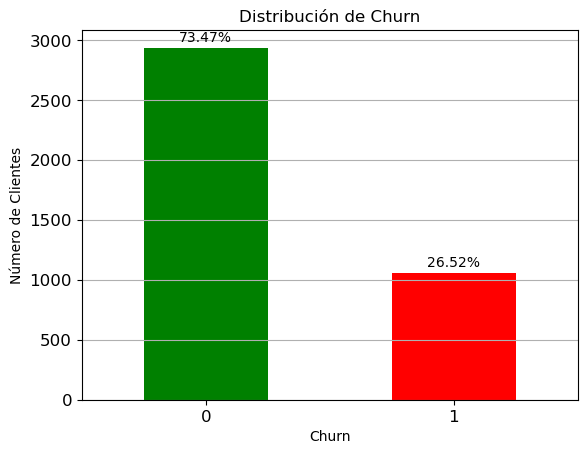

Porcentaje de cancelaciones:
churn
0    73.475
1    26.525
Name: proportion, dtype: float64



In [19]:
# Sacamos el porcentaje de cancelaciones
churn_percentage = df['churn'].value_counts(normalize=True) * 100
churn_counts = df['churn'].value_counts()


# Agrupacion por estado de cancelacion(churn)
df.groupby('churn').size().plot(kind='bar', color=['green', 'red'])
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.grid(axis='y')

# añadimos el conteo al porcentaje a cada barra
for i, (count, pct) in enumerate(zip(churn_counts, churn_percentage)):
    plt.text(i, count + 50, f'{pct:.2f}%', ha='center')

plt.show()

# Mostramos ese porcentaje de cancelaciones
print(f"Porcentaje de cancelaciones:\n{churn_percentage}\n")


### 📈Estadísticas descriptivas
Se utilizó el método `df.describe()` para obtener un resumen estadístico de las variables numéricas. A continuación se destacan algunos hallazgos relevantes:


- La variable `churn` tiene una media de **0.27**, lo que indica que aproximadamente el **27% de los clientes se han dado de baja**.
- La mayoría de los clientes **viven cerca del gimnasio (85%)** y **han dejado su número de teléfono (90%)**.
- La edad promedio es de **29 años**, con un rango entre **18 y 41 años**.
- El gasto adicional (`avg_additional_charges_total`) muestra una gran dispersión, con valores que van desde **0.15** hasta **552.59**, lo que sugiere la presencia de **outliers**.
- La duración del contrato (`contract_period`) tiene una mediana de **1 mes**, lo que indica que muchos clientes optan por contratos cortos.
- La frecuencia promedio de visitas semanales es de aproximadamente **1.8**, tanto en el total como en el último mes.

### 📊Visualización de la variable objetivo

Para reforzar la interpretación de la variable `churn`, se realizó un gráfico de barras que muestra la distribución de clientes que se quedan vs. los que se dan de baja. Esta visualización confirma que **el 27% de los clientes han abandonado el servicio**, mientras que el **73% permanecen activos**.

---


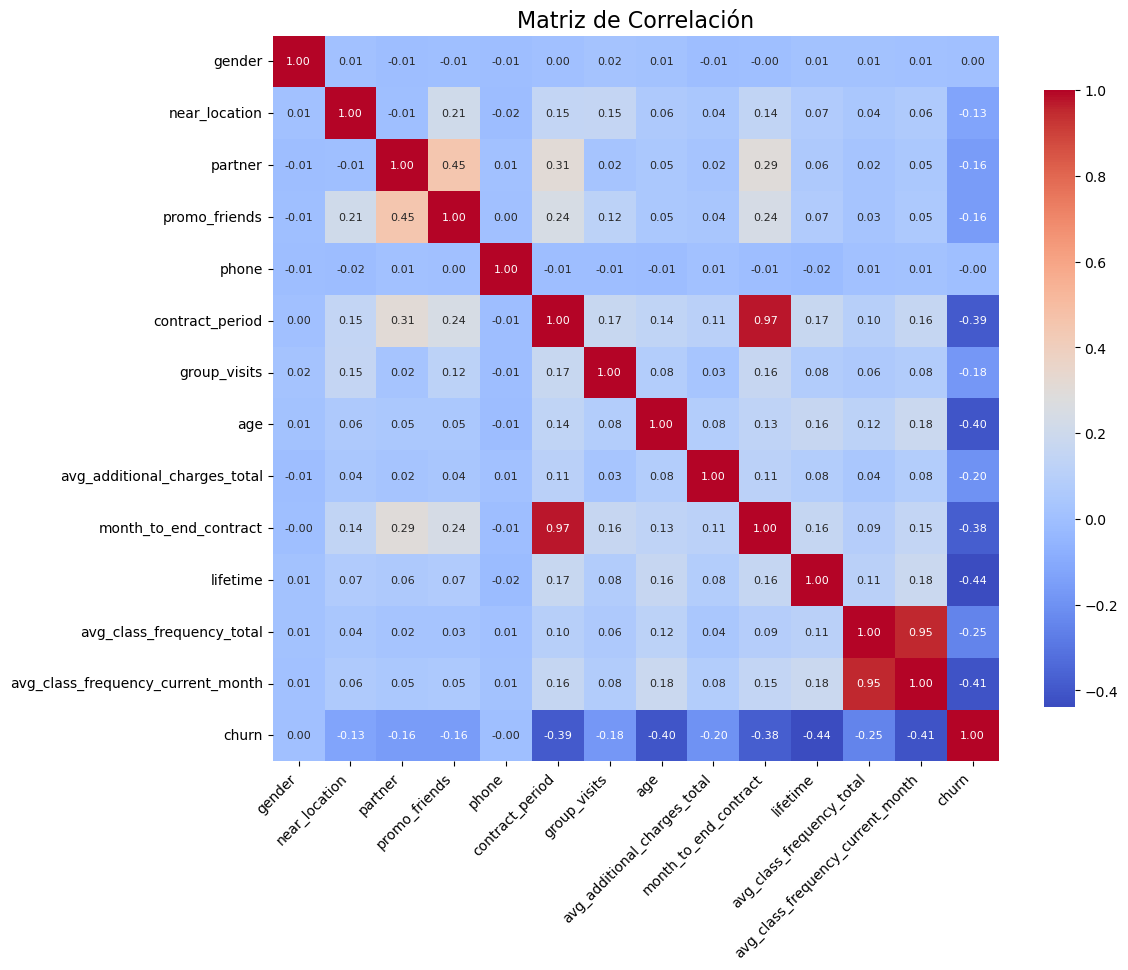

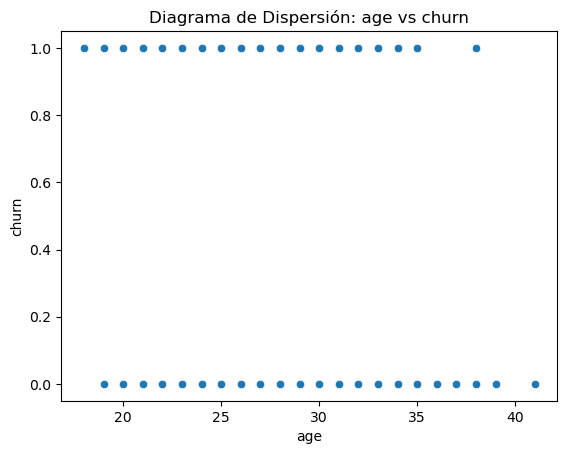

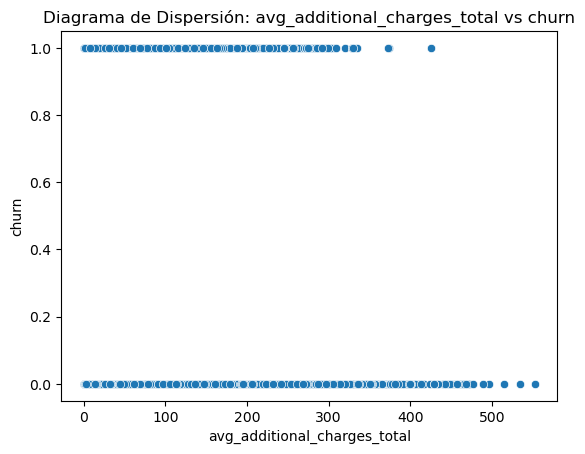

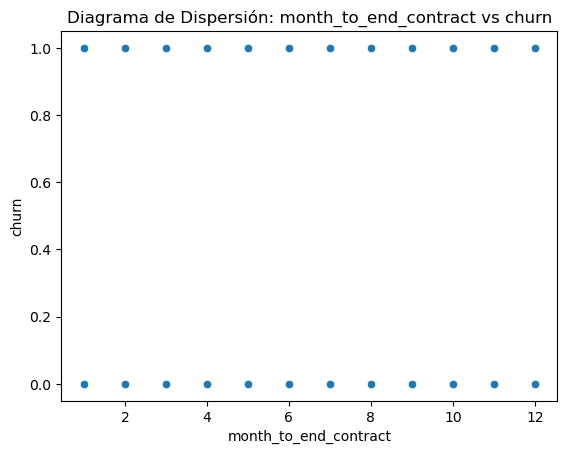

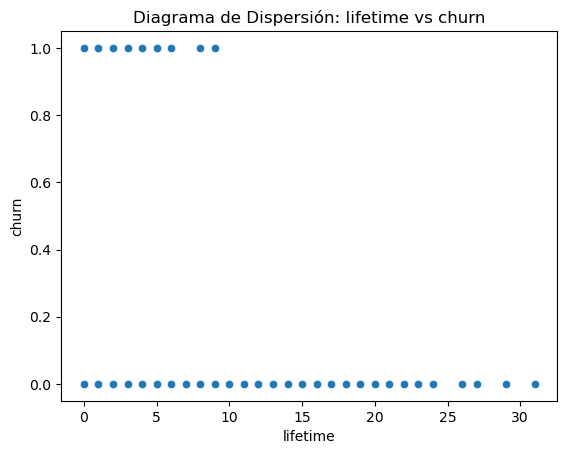

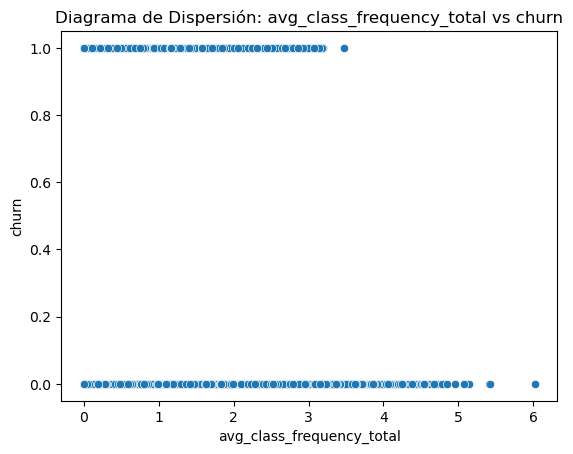

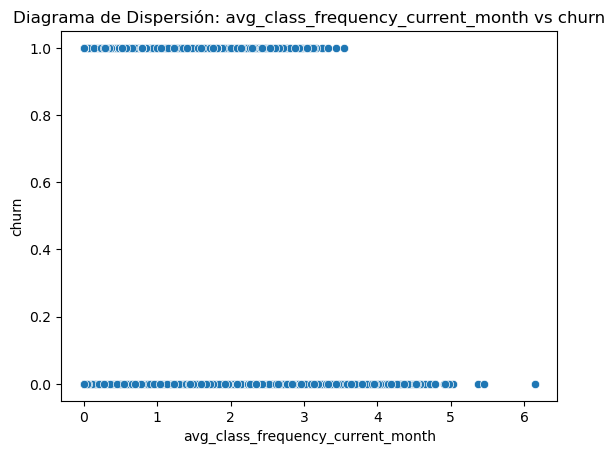

In [20]:
# Matriz de correlación
cm = df.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm', square=True, annot_kws={"size": 8}, cbar_kws={"shrink": .8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Matriz de Correlación', fontsize=16)
plt.tight_layout()
plt.show()

# Variables continuas
vc = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
      
# Trazamos diagramas de distribucion pareada de caracteristica-objetivo para cada caracteristica continua
for col in vc:
    sns.scatterplot(data=df, x=col, y='churn')
    plt.title(f'Diagrama de Dispersión: {col} vs churn')
    plt.show()

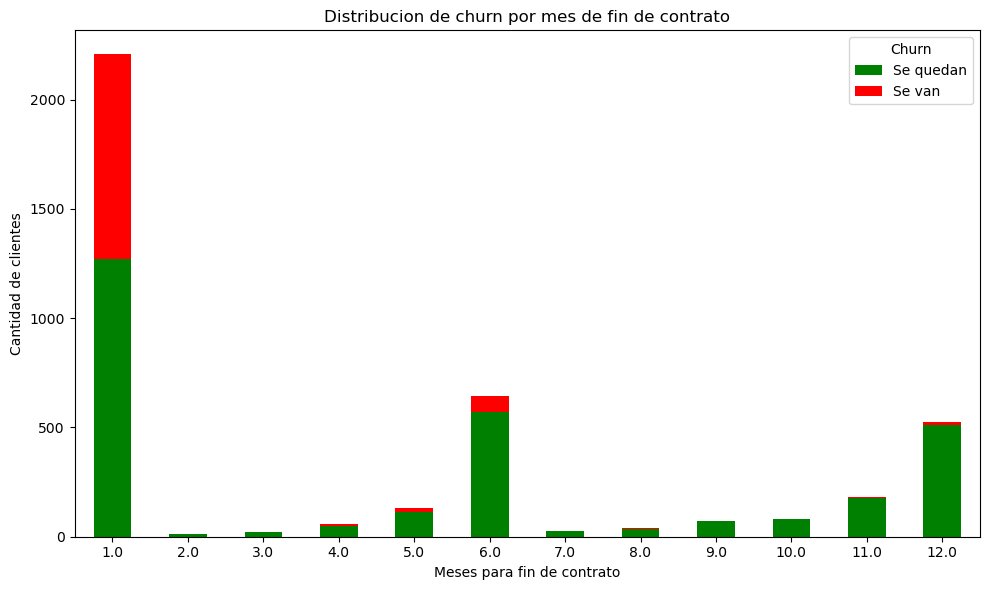

In [21]:
# Grafico de barras month_to_end_contract vs churn
bar_data = df.groupby(['month_to_end_contract', 'churn']).size().unstack(fill_value=0)
bar_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])
plt.title('Distribucion de churn por mes de fin de contrato')
plt.xlabel('Meses para fin de contrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Se quedan', 'Se van'])
plt.tight_layout()
plt.show()

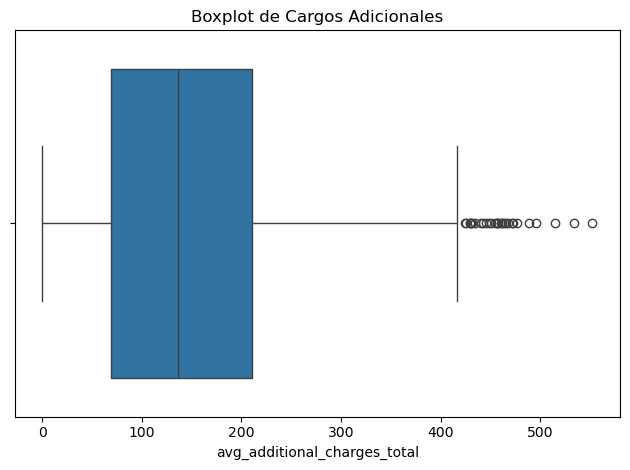

In [22]:
sns.boxplot(data=df, x='avg_additional_charges_total')
plt.title('Boxplot de Cargos Adicionales')
plt.tight_layout()
plt.show()


_____
### 🔍 Diagnóstico Estratégico de Variables Numéricas y su Relación con `churn`

Como parte del análisis exploratorio, se aplicaron técnicas visuales y estadísticas para identificar patrones relevantes entre las variables numéricas y la variable objetivo `churn`. El objetivo fue seleccionar variables informativas, detectar redundancias y documentar posibles outliers que pudieran afectar el modelado.

_____
### 🧪 Heatmap de Correlaciones

Se generó una matriz de correlación para evaluar relaciones lineales entre variables. Este análisis permitió:

- Identificar **variables altamente correlacionadas con `churn`**, como `lifetime`, `avg_class_frequency_current_month`, `age` y `contract_period`.
- Detectar **multicolinealidad entre variables independientes**, como:
  - `contract_period` ↔ `month_to_end_contract` (r = 0.97)
  - `avg_class_frequency_total` ↔ `avg_class_frequency_current_month` (r = 0.95)

📌 Estas redundancias fueron documentadas para evitar duplicidad en el modelado.

____
### 📈 Scatterplots: Variables Continuas vs `churn`

Se visualizaron las principales variables continuas contra `churn` para detectar patrones no lineales y outliers:

- `lifetime`: Clientes con mayor antigüedad tienden a permanecer activos.
- `avg_class_frequency_current_month`: La frecuencia reciente de clases es un fuerte predictor de retención.
- `age`: Los clientes mayores muestran menor tasa de abandono.
- `avg_additional_charges_total`: A mayor gasto adicional, menor churn, aunque con presencia de outliers.

📌 Estas variables fueron seleccionadas para modelado por su capacidad explicativa y patrones visuales claros.

____
### 📊 Gráfico de Barras: `month_to_end_contract` vs `churn`

Se construyó una visualización apilada para evaluar la relación entre el tiempo restante de contrato y el estado de churn:

- El **mes 1** concentra la mayor proporción de clientes que abandonan el servicio.
- Esto sugiere un **momento crítico de deserción**, posiblemente vinculado a la falta de renovación o seguimiento.

📌 Se recomienda diseñar estrategias de retención específicas para clientes que están por finalizar su contrato.

____
### 📉 Boxplot de `avg_additional_charges_total`

Se utilizó un boxplot para diagnosticar la dispersión y presencia de valores extremos en los cargos adicionales:

- La mediana se ubica cerca de **150**, con un IQR entre **50 y 250**.
- Se detectan **outliers por encima de 300**, alcanzando hasta **550**.
- Estos valores extremos podrían representar **clientes premium o casos especiales**, y deben ser evaluados antes del modelado.

📌 Se documenta la necesidad de considerar técnicas de normalización o transformación si se incluyen en modelos sensibles a escala.
____


# 🔬Desarrollo de Modelo Predictivo

In [23]:
# Creamos variables predictoras y variable objetivo
X = df.drop('churn', axis=1)
y = df['churn']

# Dividimos datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Encapsulamos variables binarias y continuas
bynary_features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
continuous_features = ['age', 'lifetime', 'contract_period', 'month_to_end_contract', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'avg_additional_charges_total']

# Preprocesamiento de datos para variables continuas
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), continuous_features)
    ], remainder='passthrough')

# Creamos un pipeline regresion logistica
model_log = Pipeline([
    ('preprocesamiento', preprocessor),
    ('model', LogisticRegression(random_state=0))
])

# Modelo random forest
model_rf = RandomForestClassifier(random_state=0)

# Entrenamos los modelos
model_log.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

# Predicciones
y_pred_log = model_log.predict(X_test)
y_pred_rf = model_rf.predict(X_test)


## 📝Evaluacion de modelos

In [24]:
# Funcion para evaluar modelos
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    print(f"Evaluación del modelo {model_name}:")
    print(f"  - Exactitud: {accuracy:.2f}")
    print(f"  - Precision: {precision:.2f}")
    print(f"  - Recall: {recall:.2f}\n")

In [25]:
# Resultados de los modelos
results_log = evaluate_model(y_test, y_pred_log, "Regresión Logística")
results_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")

Evaluación del modelo Regresión Logística:
  - Exactitud: 0.94
  - Precision: 0.90
  - Recall: 0.85

Evaluación del modelo Random Forest:
  - Exactitud: 0.92
  - Precision: 0.88
  - Recall: 0.83



In [26]:
# Comparacion de resultados
results = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Random Forest'],
    'Exactitud': [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf)],
    'Precisión': [precision_score(y_test, y_pred_log), precision_score(y_test, y_pred_rf)],
    'Recall': [recall_score(y_test, y_pred_log), recall_score(y_test, y_pred_rf)]
})

results

,Modelo,Exactitud,Precisión,Recall
0,Regresión Logística,0.9350,0.89604,0.853774
1,Random Forest,0.9225,0.87500,0.825472


## ✅ Conclusión del desarrollo de modelos predictivos

- Se definieron variables predictoras (`X`) y objetivo (`y = churn`), dividiendo los datos con `stratify=y` para mantener la proporción de clases en entrenamiento y prueba. Esta decisión fue resultado de investigación adicional para mejorar la representatividad.

- Se separaron variables **binarias** y **continuas** para aplicar escalado solo donde corresponde. Se utilizó `ColumnTransformer` con `StandardScaler` y `remainder='passthrough'` para conservar las variables no escaladas. Esta técnica se incorporó por claridad y control.

- Se construyó un `Pipeline` para **Regresión Logística**, integrando preprocesamiento y modelo en un solo flujo reproducible. También se entrenó un **Random Forest** como comparativo, sin escalado.

- Ambos modelos fueron entrenados y evaluados sobre el mismo conjunto de prueba, usando una función que calcula **exactitud**, **precisión** y **recall**, imprimiendo resultados con formato claro.

- Los resultados mostraron que **Regresión Logística** superó a **Random Forest** en todas las métricas, por lo que se selecciona como modelo final por su mejor desempeño y mayor interpretabilidad.
__________

____
# 🧩 Perfiles de Usuarios

## 〽️Dendograma

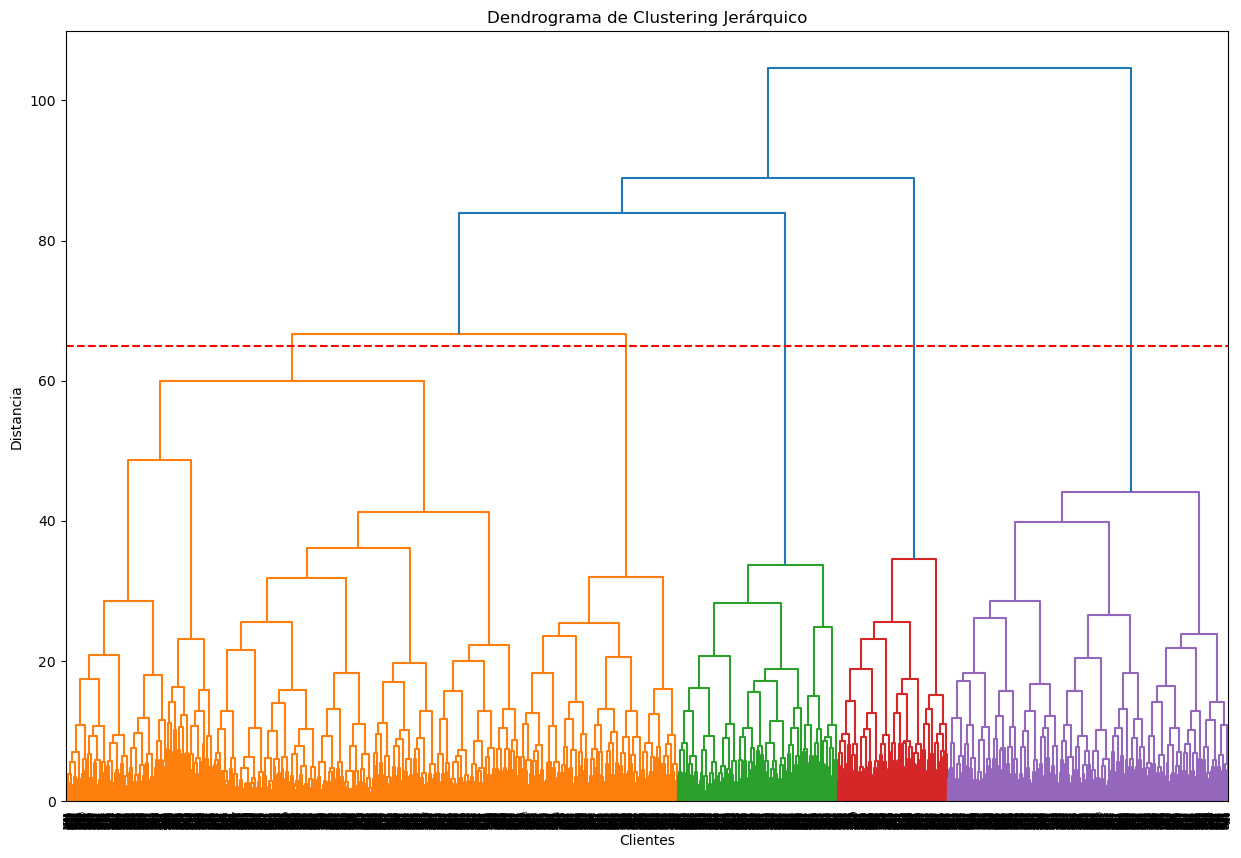

In [29]:
# estandarizamos features para linkage
sc = StandardScaler()
X_sc = sc.fit_transform(X)
# linkage
linked = linkage(X_sc, method='ward')

# Dendograma
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrograma de Clustering Jerárquico')
plt.axhline(y=65, color='r', linestyle='--')  # Línea de corte
plt.xlabel('Clientes')
plt.ylabel('Distancia') 
plt.show()

## 👥Agrupamiento - K-means

In [30]:
# aplicamos k-means
kmeans = KMeans(n_clusters=5, random_state=0)
df['cluster'] = kmeans.fit_predict(X_sc)

Distribución de clientes por clúster:
cluster
0    1138
1     746
2     941
3     631
4     544
Name: count, dtype: int64



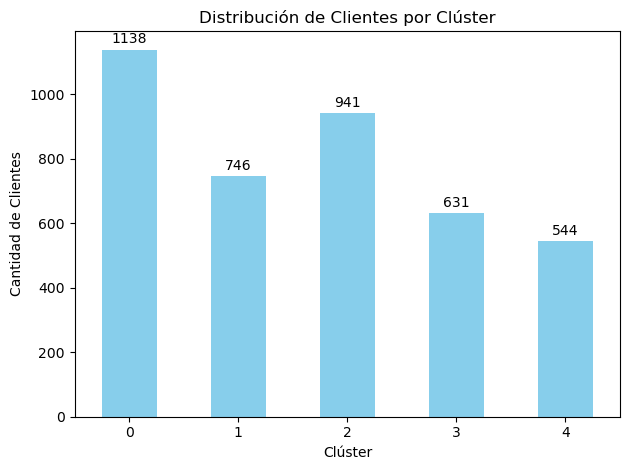

In [33]:
# analizamos clusters
cluster_counts = df['cluster'].value_counts().sort_index()
print(f"Distribución de clientes por clúster:\n{cluster_counts}\n")


# Grafico de distribucion de clusters
ax = cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Clientes por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)

# Añadir los totales encima de cada barra
for i, count in enumerate(cluster_counts):
    ax.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



In [34]:
print(df.groupby('cluster').mean().T)
chunr_rate_per_cluster = df.groupby('cluster')['churn'].mean()

cluster                                     0           1           2  \
gender                               0.486819    0.592493    0.499469   
near_location                        1.000000    0.970509    0.943677   
partner                              0.243409    0.288204    0.740701   
promo_friends                        0.007030    0.123324    0.489904   
phone                                0.899824    0.898123    0.900106   
contract_period                      1.978910    2.898123   11.866100   
group_visits                         0.326889    0.482574    0.551541   
age                                 28.239016   30.339142   29.905420   
avg_additional_charges_total       130.877033  164.193829  165.146492   
month_to_end_contract                1.896309    2.654155   10.852285   
lifetime                             2.477153    5.219839    4.737513   
avg_class_frequency_total            1.318003    2.937411    1.989423   
avg_class_frequency_current_month    1.083831    2.

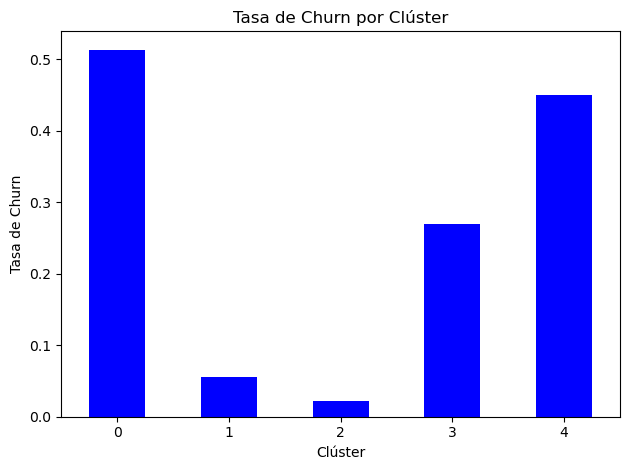

In [36]:
# Grafico de tasa de churn por cluster
ax = chunr_rate_per_cluster.plot(kind='bar', color='blue')
plt.title('Tasa de Churn por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Tasa de Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

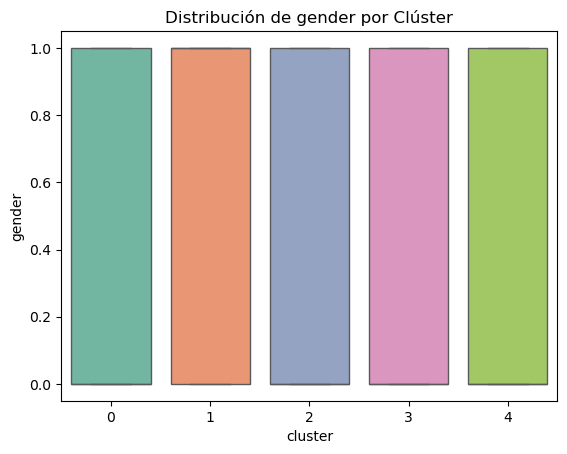

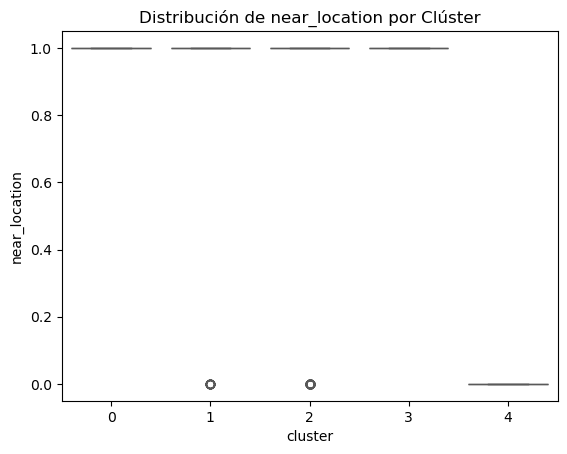

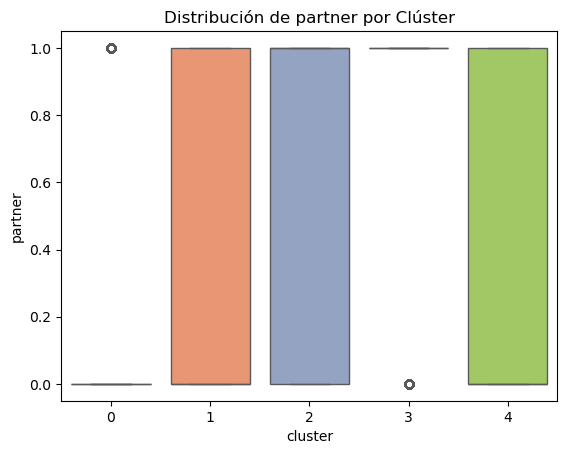

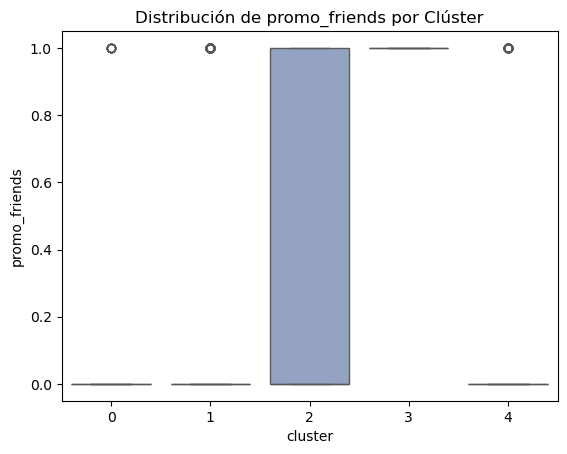

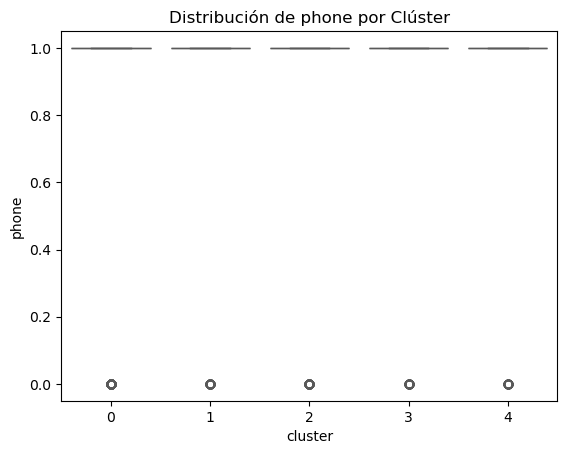

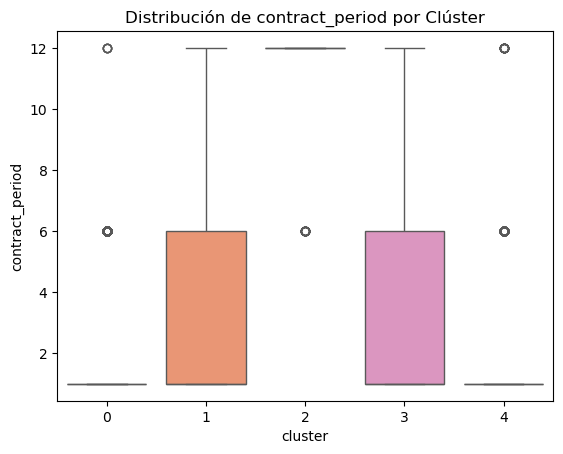

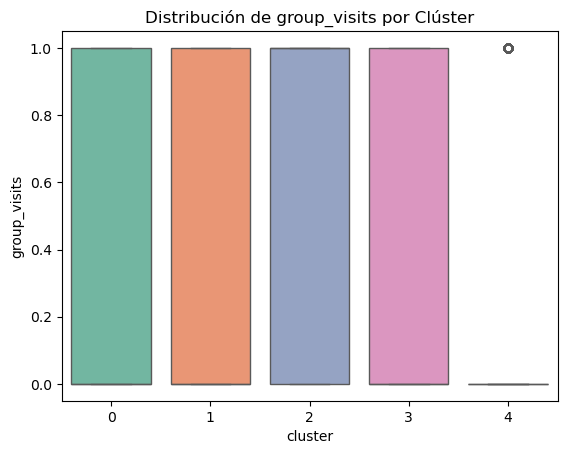

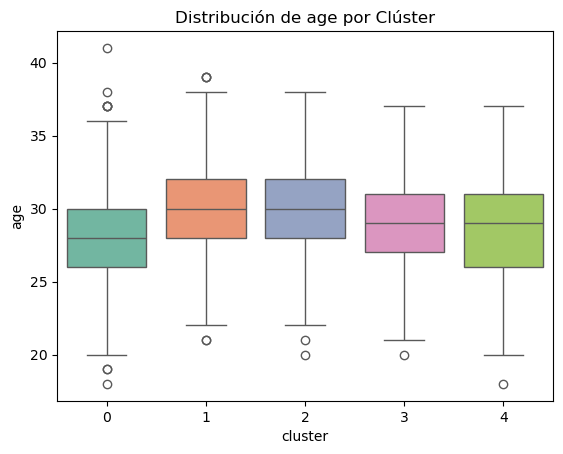

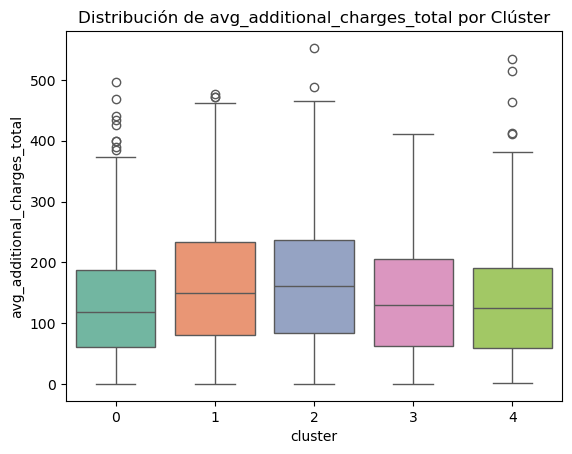

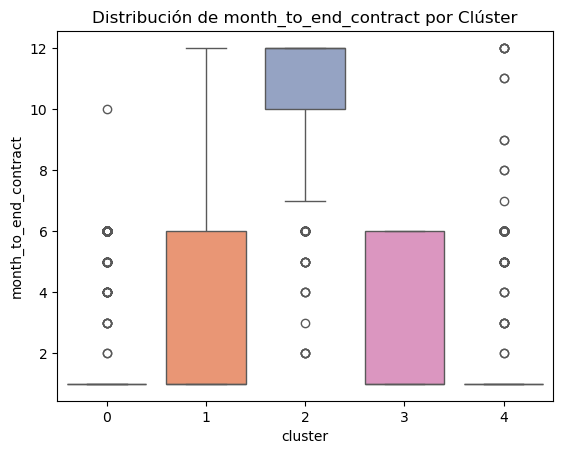

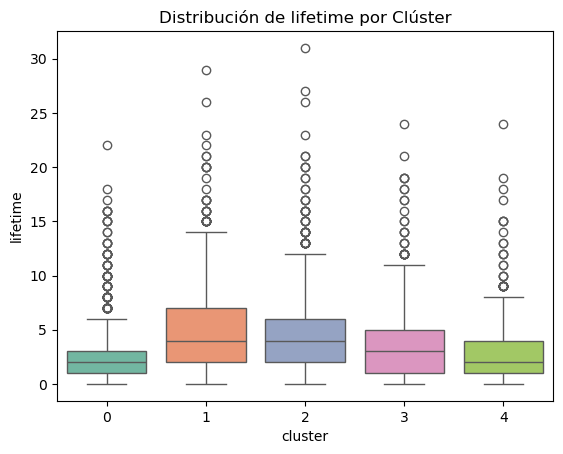

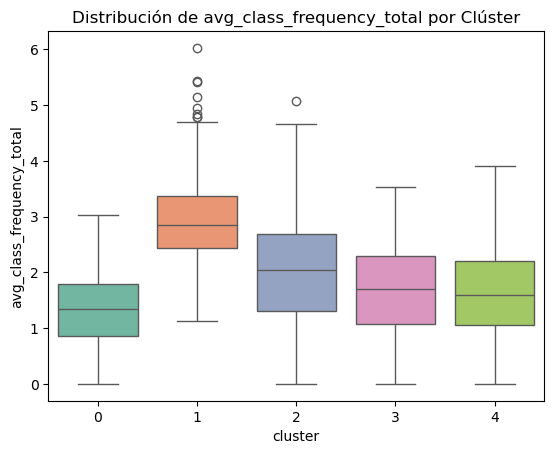

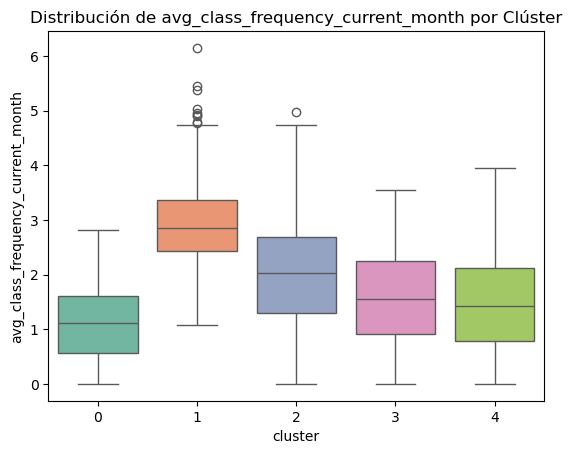

In [ ]:
# Repetir para otras variables relevantes
for col in X.columns:
    sns.boxplot(data=df, x='cluster', y=col, hue='cluster', palette='Set2', dodge=False)
    plt.title(f'Distribución de {col} por Clúster')
    plt.legend([],[], frameon=False) 
    plt.show()



_______________
## 🔍 Segmentación de perfiles mediante clustering jerárquico y KMeans

Este módulo documenta el proceso de segmentación de clientes a partir de variables relevantes como edad, antigüedad, frecuencia de clases y uso de promociones. Se aplicaron dos enfoques complementarios: **clustering jerárquico** para diagnóstico exploratorio y **KMeans** para segmentación final.

---

### 🧪 1. Diagnóstico con dendrograma

Se utilizó **clustering jerárquico con linkage='ward'** sobre las variables estandarizadas (excluyendo la cancelación) para visualizar la estructura de similitud entre observaciones. El dendrograma reveló una separación natural en **5 grupos**, lo que motivó la elección de `n_clusters=5` para el modelo KMeans.

> Esta etapa permitió validar la existencia de agrupamientos significativos sin imponer una segmentación arbitraria.

---

### ⚙️ 2. Implementación de KMeans

Se aplicó `KMeans(n_clusters=5, random_state=0)` sobre las variables estandarizadas. El modelo logró una segmentación clara y reproducible, con perfiles diferenciados en comportamiento y riesgo de cancelación.

Se visualizó la distribución de clientes por clúster mediante gráfico de barras, destacando la proporción de usuarios en cada grupo.

---

### 📊 3. Comparación horizontal de clústeres

Se presenta a continuación la tabla transpuesta de medias por clúster, junto con la cantidad de clientes en cada grupo:

| Variable                          | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3 | Cluster 4 |
|----------------------------------|-----------|-----------|-----------|-----------|-----------|
| 🧍‍♂️ Cantidad de clientes         | 1138      | 746       | 941       | 631       | 544       |
| Edad promedio                    | 28.2      | 30.3      | 29.9      | 29.0      | 28.4      |
| Antigüedad (lifetime)            | 2.47      | 5.21      | 4.73      | 3.51      | 2.78      |
| Frecuencia clases actual (mes)   | 1.08      | 2.94      | 1.98      | 1.54      | 1.46      |
| Periodo de contrato              | 1.97      | 2.89      | 11.86     | 3.07      | 2.20      |
| Uso de promociones               | 0.007     | 0.12      | 0.48      | 1.00      | 0.07      |
| Tasa de cancelación              | 0.51      | 0.05      | 0.02      | 0.27      | 0.45      |

---

### 📈 4. Distribución de características por clúster

Se trazaron **boxplots por clúster** para todas las variables relevantes, permitiendo visualizar la dispersión, mediana y presencia de outliers. Esta visualización complementa la tabla de medias y refuerza la interpretación de los perfiles.

> Las boxplots revelan que algunos clústeres tienen alta variabilidad interna, mientras que otros son más homogéneos. Esto es clave para diseñar estrategias diferenciadas.

---

### 🧠 5. Interpretación estratégica de perfiles

- **Cluster 0 – Usuarios en riesgo**  
  Baja frecuencia, poca antigüedad y alta cancelación. Perfil volátil. Es el grupo más numeroso.

- **Cluster 1 – Clientes estables**  
  Frecuencia alta, antigüedad elevada y baja cancelación. Perfil ideal para fidelización.

- **Cluster 2 – Contratos largos, bajo churn**  
  Periodos de contrato extensos, baja cancelación. Potencial para retención pasiva.

- **Cluster 3 – Promocionales activos**  
  Uso intensivo de promociones, frecuencia moderada. Cancelación intermedia.

- **Cluster 4 – Jóvenes indecisos**  
  Frecuencia baja, cancelación alta. Requieren intervención personalizada.

---

__________
# 🧠 Conclusiones y recomendaciones estratégicas

A partir del análisis de clústeres y las correlaciones observadas entre características y abandono, se identifican principios clave para mejorar la interacción y retención de clientes:

---

## 1. 🎯 Identificar segmentos en riesgo
Los clústeres con alta tasa de cancelación (como el 0 y el 4) comparten baja frecuencia de uso, poca antigüedad y escasa participación en promociones.

**Recomendación**:  
Implementar campañas de activación temprana, como clases gratuitas, retos semanales o beneficios por permanencia en el primer mes.

---

## 2. 🤝 Reforzar la lealtad de clientes comprometidos
Los clústeres 1 y 2 muestran alta frecuencia, contratos largos y baja cancelación.

**Recomendación**:  
Diseñar programas de fidelización, recompensas por antigüedad, y referidos para que estos clientes atraigan nuevos usuarios.

---

## 3. 📢 Aprovechar el efecto de promociones grupales
El clúster 3 destaca por su uso intensivo de promociones y visitas grupales, con cancelación intermedia.

**Recomendación**:  
Potenciar campañas de “trae a un amigo”, descuentos por grupo y eventos comunitarios para consolidar el hábito.

---

## 4. 📊 Personalizar la comunicación según perfil
Cada clúster responde a motivadores distintos. La segmentación permite adaptar mensajes, canales y ofertas según el comportamiento detectado.

**Recomendación**:  
Usar automatización de marketing para enviar contenido personalizado: recordatorios, logros, encuestas y recomendaciones basadas en uso.

---

> Estas recomendaciones se derivan del análisis de clústeres y se ven reforzadas por correlaciones observadas entre abandono y variables como frecuencia de clases, antigüedad y participación en promociones.


____
____

# 🧩 Cierre

Este análisis no solo permite comprender los patrones de abandono y fidelidad, sino que ofrece una base sólida para diseñar estrategias de marketing segmentadas, medibles y adaptables. La segmentación obtenida puede integrarse directamente en campañas operativas, dashboards de seguimiento o modelos predictivos futuros. Con ello, se transforma el diagnóstico en acción concreta, alineando decisiones comerciales con evidencia analítica.
